In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

#!wget https://s3.amazonaws.com/ps.public.resources/ml-showcase/salary.csv
df = pd.read_csv('MLs15b salary.csv')
df.head(10)

,salary
0,26100
1,73188
2,33333333333
3,14623
4,44444444444
5,95759
6,22368
7,90715
8,18507
9,11559


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


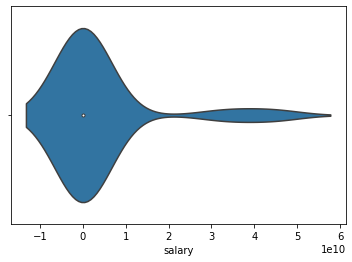

In [ ]:
sns.violinplot(df.salary)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


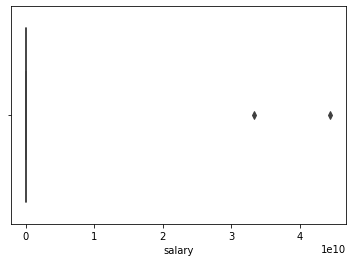

In [ ]:
sns.boxplot(df.salary)

In [ ]:
model=IsolationForest(n_estimators=50, max_samples='auto', 
                      contamination=float(0.1),max_features=1.0)
model.fit(df[['salary']])

df['scores']=model.decision_function(df[['salary']])
df['anomaly']=model.predict(df[['salary']])
df.head(20)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


,salary,scores,anomaly
0,26100,0.128284,1
1,73188,0.058310,1
2,33333333333,-0.182595,-1
3,14623,0.162543,1
4,44444444444,-0.218404,-1
5,95759,0.120739,1
6,22368,0.162361,1
7,90715,0.020288,1
8,18507,0.125514,1
9,11559,0.136617,1


In [ ]:
anomaly=df.loc[df['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

outliers_counter = len(df[df['salary'] > 99999])
outliers_counter

        salary    scores  anomaly
2  33333333333 -0.182595       -1
4  44444444444 -0.218404       -1


2

In [ ]:
print("Accuracy percentage:", 100*list(df['anomaly']).count(-1)/(outliers_counter))

Accuracy percentage: 100.0
